## 패키지 불러오기

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from tqdm import tqdm

## 데이터 불러오기

In [132]:
df_train = pd.read_csv('/content/funda_train.csv', encoding = 'utf-8')
df_sub = pd.read_csv('/content/submission.csv', encoding = 'utf-8')


print(df_train.shape)

(6556613, 9)


In [133]:
df_train.head(3)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000


In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [135]:
num_store=len(df_train['store_id'].unique())
num_card=len(df_train['card_company'].unique())
num_region=len(df_train['region'].unique())
num_business=len(df_train['type_of_business'].unique())
num_installment=len(df_train['installment_term'].unique())

print(f'store_id : {num_store}')
print(f'card_company : {num_card}')
print(f'region : {num_region}')
print(f'type_of_business : {num_business}')
print(f'installment_term : {num_installment}',end='\n')

store_id : 1967
card_company : 8
region : 181
type_of_business : 146
installment_term : 34


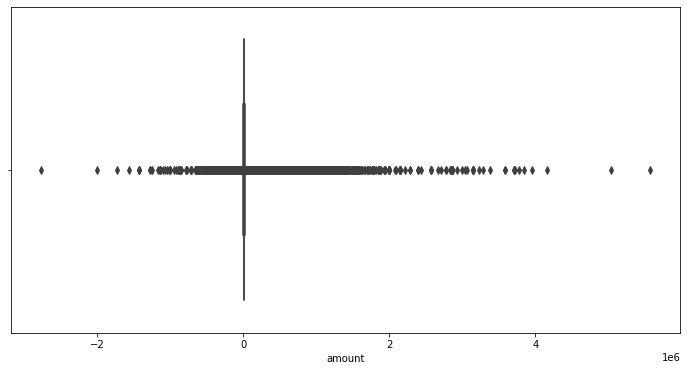

In [136]:
plt.figure(figsize=(12,6))
sns.boxplot(x='amount',data=df_train)
#-가 있다?

In [137]:
#환불 정보임을 알 수 있다
df_train[df_train['amount']<0][:5]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
41,0,40,a,2016-06-10,17:26,2,NaN,기타 미용업,-8571.428571
347,0,285,a,2016-08-04,17:52,0,NaN,기타 미용업,-1857.142857
731,0,473,g,2016-10-17,10:32,0,NaN,기타 미용업,-2000.000000
831,0,230,b,2016-11-03,15:36,0,NaN,기타 미용업,-85.714286
944,0,138,a,2016-11-28,13:21,0,NaN,기타 미용업,-57.142857


In [138]:
df_train.isna().sum()

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

In [139]:
print('region nan data :',(df_train.region.isna().sum()/len(df_train)).round(3))
print('type_of_business nan data :',(df_train.type_of_business.isna().sum()/len(df_train)).round(3))

region nan data : 0.312
type_of_business nan data : 0.603


[알 수 있는 것들]

1.데이터 갯수가 60만개 이상 > 보통의 방법으로는 처리시간이 많이 걸림. > store_id로 나눠 생각한다.

2.transacted_date와 transacted_time 을 합쳐 datetime 형식으로 바꾼다. > 시계열 데이터 처리를 위한다.

3.숫자형 데이터의 describe()를 봤을 때, amount의 음수가 있다.

4.시계열 데이터를 위해 월별 데이터를 모은다.

5.결측율이 region과 type_of_business 가 각각 30%와 60%를 넘어가며, 채우는데 더 오랜 시간이 걸릴걸로 보아 제거한다.

## 데이터 전처리

In [140]:
df_train

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571


In [141]:
#합치기: 날짜와 시간으로 분리된 변수를 합쳐줍니다 
df_train['date']=df_train['transacted_date']+' '+df_train['transacted_time']
df_train['date']=pd.to_datetime(df_train['date'])

In [142]:
df_train

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,date
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,2016-06-01 13:13:00
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,2016-06-01 18:12:00
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000,2016-06-01 18:52:00
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857,2016-06-01 20:22:00
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000,2016-06-02 11:06:00
...,...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000,2019-02-28 23:20:00
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143,2019-02-28 23:24:00
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000,2019-02-28 23:24:00
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571,2019-02-28 23:27:00


In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   store_id          int64         
 1   card_id           int64         
 2   card_company      object        
 3   transacted_date   object        
 4   transacted_time   object        
 5   installment_term  int64         
 6   region            object        
 7   type_of_business  object        
 8   amount            float64       
 9   date              datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 500.2+ MB


In [144]:
#시간을 index로 해줍니다
df_train.set_index('date', inplace=True)

In [145]:
df_train

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
date,,,,,,,,,
2016-06-01 13:13:00,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
2016-06-01 18:12:00,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2016-06-01 18:52:00,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
2016-06-01 20:22:00,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
2016-06-02 11:06:00,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
2019-02-28 23:20:00,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
2019-02-28 23:24:00,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
2019-02-28 23:24:00,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000


In [146]:
df_train.index

DatetimeIndex(['2016-06-01 13:13:00', '2016-06-01 18:12:00',
               '2016-06-01 18:52:00', '2016-06-01 20:22:00',
               '2016-06-02 11:06:00', '2016-06-02 13:09:00',
               '2016-06-02 15:33:00', '2016-06-02 17:18:00',
               '2016-06-02 18:30:00', '2016-06-02 19:56:00',
               ...
               '2019-02-28 22:35:00', '2019-02-28 22:43:00',
               '2019-02-28 22:45:00', '2019-02-28 23:03:00',
               '2019-02-28 23:20:00', '2019-02-28 23:20:00',
               '2019-02-28 23:24:00', '2019-02-28 23:24:00',
               '2019-02-28 23:27:00', '2019-02-28 23:54:00'],
              dtype='datetime64[ns]', name='date', length=6556613, freq=None)

In [147]:
#월별로 resample
data_month=pd.DataFrame()
for i in tqdm(df_train.store_id.unique()):
    data_num=df_train[df_train.store_id==i]
    sum_amount=data_num['amount'].resample(rule='m').sum()
    data_mon=pd.concat([sum_amount],axis=1)
    data_mon.insert(0,'store_id',i)
    data_month=pd.concat([data_month,data_mon],axis=0)
    
#data_month.head(10)







  0%|          | 0/1967 [00:00<?, ?it/s]





  0%|          | 7/1967 [00:00<00:28, 69.68it/s]





  1%|          | 15/1967 [00:00<00:28, 69.28it/s]





  1%|          | 23/1967 [00:00<00:27, 69.91it/s]





  2%|▏         | 30/1967 [00:00<00:27, 69.28it/s]





  2%|▏         | 38/1967 [00:00<00:27, 70.12it/s]





  2%|▏         | 45/1967 [00:00<00:27, 69.81it/s]





  3%|▎         | 52/1967 [00:00<00:28, 68.25it/s]





  3%|▎         | 59/1967 [00:00<00:27, 68.67it/s]





  3%|▎         | 66/1967 [00:00<00:27, 68.62it/s]





  4%|▎         | 73/1967 [00:01<00:27, 68.35it/s]





  4%|▍         | 80/1967 [00:01<00:28, 67.15it/s]





  4%|▍         | 87/1967 [00:01<00:27, 67.88it/s]





  5%|▍         | 94/1967 [00:01<00:27, 68.14it/s]





  5%|▌         | 102/1967 [00:01<00:26, 69.51it/s]





  6%|▌         | 110/1967 [00:01<00:26, 70.47it/s]





  6%|▌         | 118/1967 [00:01<00:25, 71.25it/s]





  6%|▋         | 126/1967 [00:01<00:26, 70.61it/s]





  7%|▋    

In [148]:
data_month

,store_id,amount
date,,
2016-06-30,0,7.470000e+05
2016-07-31,0,1.005000e+06
2016-08-31,0,8.715714e+05
2016-09-30,0,8.978571e+05
2016-10-31,0,8.354286e+05
...,...,...
2018-10-31,2136,2.012214e+06
2018-11-30,2136,2.135429e+06
2018-12-31,2136,2.427429e+06


In [149]:
def sub(df, n):
    concat_3mon=pd.DataFrame(index=pd.to_datetime(['2019-03-31','2019-04-30','2019-05-31']))
    df_sma=pd.DataFrame(columns=['store_id', 'amount'])
    
    for i in data_month['store_id'].unique():
        df_set=pd.DataFrame(df[df['store_id']==i].amount)
        sma_train=pd.concat([df_set, concat_3mon], axis=0)
        num = sma_train.amount.rolling(window=n,min_periods=1).mean().values[-3:].sum()
        df_sma.loc[i, 'store_id']=i
        df_sma.loc[i, 'amount']=num
        
    return df_sma

In [150]:
#함수 풀어 보기

In [151]:
concat_3mon=pd.DataFrame(index=pd.to_datetime(['2019-03-31','2019-04-30','2019-05-31']))
 #예측값이 포함된 빈 데이터 프레임을 만들어 줍니다.
df_set=pd.DataFrame(data_month[data_month['store_id']==2].amount) 
#store_id별 amount가 담긴 df_set데이터 프레임을 만들어 주고
sma_train=pd.concat([df_set, concat_3mon], axis=0)
 #store_id별로 df_set에 concat_3mon을 합쳐줍니다

In [152]:
#store_id 별 sma_train은 아래와 같습니다.
sma_train

,amount
2016-06-30,260714.285714
2016-07-31,82857.142857
2016-08-31,131428.571429
2016-09-30,142857.142857
2016-10-31,109714.285714
2016-11-30,198571.428571
2016-12-31,160000.000000
2017-01-31,180714.285714
2017-02-28,154285.714286
2017-03-31,43571.428571


In [153]:
#단순이동 평균기법을 사용해서 마지막 3일의 예측치를 구해줍니다.
num = sma_train.amount.rolling(window=4, min_periods=1).mean()

In [154]:
num

2016-06-30    260714.285714
2016-07-31    171785.714286
2016-08-31    158333.333333
2016-09-30    154464.285714
2016-10-31    116714.285714
2016-11-30    145642.857143
2016-12-31    152785.714286
2017-01-31    162250.000000
2017-02-28    173392.857143
2017-03-31    134642.857143
2017-04-30    145000.000000
2017-05-31    146428.571429
2017-06-30    138000.000000
2017-07-31    178892.857143
2017-08-31    176035.714286
2017-09-30    187642.857143
2017-10-31    224178.571429
2017-11-30    235607.142857
2017-12-31    247750.000000
2018-01-31    264464.285714
2018-02-28    276000.000000
2018-03-31    260214.285714
2018-04-30    271464.285714
2018-05-31    314750.000000
2018-06-30    325107.142857
2018-07-31    450000.000000
2018-08-31    493571.428571
2018-09-30    495535.714286
2018-10-31    534464.285714
2018-11-30    408500.000000
2018-12-31    379214.285714
2019-01-31    361000.000000
2019-02-28    357714.285714
2019-03-31    415142.857143
2019-04-30    452357.142857
2019-05-31    496857

In [155]:
#min_periods가 없다면 결측치가 발생합니다. 왜? 앞 뒤로 없기 때문에
num = sma_train.amount.rolling(window=4).mean()
num

2016-06-30              NaN
2016-07-31              NaN
2016-08-31              NaN
2016-09-30    154464.285714
2016-10-31    116714.285714
2016-11-30    145642.857143
2016-12-31    152785.714286
2017-01-31    162250.000000
2017-02-28    173392.857143
2017-03-31    134642.857143
2017-04-30    145000.000000
2017-05-31    146428.571429
2017-06-30    138000.000000
2017-07-31    178892.857143
2017-08-31    176035.714286
2017-09-30    187642.857143
2017-10-31    224178.571429
2017-11-30    235607.142857
2017-12-31    247750.000000
2018-01-31    264464.285714
2018-02-28    276000.000000
2018-03-31    260214.285714
2018-04-30    271464.285714
2018-05-31    314750.000000
2018-06-30    325107.142857
2018-07-31    450000.000000
2018-08-31    493571.428571
2018-09-30    495535.714286
2018-10-31    534464.285714
2018-11-30    408500.000000
2018-12-31    379214.285714
2019-01-31    361000.000000
2019-02-28    357714.285714
2019-03-31              NaN
2019-04-30              NaN
2019-05-31          

In [156]:
for i in tqdm(range(4, 7)):
    sma_sub = sub(data_month, i)
    sma_sub.to_csv(f'funda_{i}sma_sub.csv',index=False)







  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:06<00:12,  6.12s/it]





 67%|██████▋   | 2/3 [00:12<00:06,  6.15s/it]





100%|██████████| 3/3 [00:18<00:00,  6.13s/it]


In [157]:
sub(data_month, 3)

,store_id,amount
0,0,NaN
1,1,NaN
2,2,NaN
4,4,NaN
5,5,NaN
...,...,...
2132,2132,NaN
2133,2133,NaN
2134,2134,NaN
2135,2135,NaN


In [162]:
df_train.loc[(df_train['type_of_business'].isnull() == True) & (df_train.region.isnull() == True)]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
date,,,,,,,,,
2016-06-01 13:31:00,1,1931,b,2016-06-01,13:31,0,NaN,NaN,1071.428571
2016-06-01 14:18:00,1,1932,h,2016-06-01,14:18,0,NaN,NaN,428.571429
2016-06-01 15:07:00,1,1933,c,2016-06-01,15:07,0,NaN,NaN,1142.857143
2016-06-01 15:12:00,1,1934,g,2016-06-01,15:12,0,NaN,NaN,1142.857143
2016-06-01 16:06:00,1,1935,a,2016-06-01,16:06,0,NaN,NaN,1071.428571
...,...,...,...,...,...,...,...,...,...
2019-02-28 00:42:00,2135,4658205,a,2019-02-28,00:42,0,NaN,NaN,5714.285714
2019-02-28 19:58:00,2135,4658206,c,2019-02-28,19:58,0,NaN,NaN,5857.142857
2019-02-28 22:20:00,2135,4658207,c,2019-02-28,22:20,0,NaN,NaN,3285.714286


In [163]:
data_month.store_id

date
2016-06-30       0
2016-07-31       0
2016-08-31       0
2016-09-30       0
2016-10-31       0
              ... 
2018-10-31    2136
2018-11-30    2136
2018-12-31    2136
2019-01-31    2136
2019-02-28    2136
Name: store_id, Length: 60915, dtype: int64

In [164]:
data_month.groupby('date')['store_id'].count()

date
2016-06-30    1356
2016-07-31    1408
2016-08-31    1467
2016-09-30    1510
2016-10-31    1550
2016-11-30    1606
2016-12-31    1661
2017-01-31    1711
2017-02-28    1761
2017-03-31    1831
2017-04-30    1899
2017-05-31    1967
2017-06-30    1967
2017-07-31    1967
2017-08-31    1967
2017-09-30    1967
2017-10-31    1967
2017-11-30    1967
2017-12-31    1967
2018-01-31    1967
2018-02-28    1967
2018-03-31    1965
2018-04-30    1965
2018-05-31    1965
2018-06-30    1965
2018-07-31    1963
2018-08-31    1963
2018-09-30    1963
2018-10-31    1960
2018-11-30    1956
2018-12-31    1950
2019-01-31    1944
2019-02-28    1926
Name: store_id, dtype: int64

In [169]:
df_train['card_id'].value_counts()

3820295    2443
3820350    1214
1877306     645
2838881     563
3820294     512
           ... 
1121230       1
1117132       1
1129418       1
1137606       1
3792699       1
Name: card_id, Length: 3950001, dtype: int64

In [170]:
df_train.loc[df_train['card_id'] == 3820295]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
date,,,,,,,,,
2017-10-13 12:44:00,1770,3820295,h,2017-10-13,12:44,0,NaN,NaN,242.857143
2017-10-13 12:44:00,1770,3820295,h,2017-10-13,12:44,0,NaN,NaN,-242.857143
2017-10-13 12:45:00,1770,3820295,h,2017-10-13,12:45,0,NaN,NaN,257.142857
2017-10-13 12:45:00,1770,3820295,h,2017-10-13,12:45,0,NaN,NaN,-257.142857
2017-10-13 12:45:00,1770,3820295,h,2017-10-13,12:45,0,NaN,NaN,271.428571
...,...,...,...,...,...,...,...,...,...
2018-01-31 12:51:00,1770,3820295,h,2018-01-31,12:51,0,NaN,NaN,-685.714286
2018-01-31 12:52:00,1770,3820295,h,2018-01-31,12:52,0,NaN,NaN,700.000000
2018-01-31 12:52:00,1770,3820295,h,2018-01-31,12:52,0,NaN,NaN,-700.000000


In [171]:
df_train.loc[df_train['store_id'] == 1770]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
date,,,,,,,,,
2016-06-01 12:32:00,1770,3820007,h,2016-06-01,12:32,0,NaN,NaN,714.285714
2016-06-01 17:10:00,1770,3820008,b,2016-06-01,17:10,0,NaN,NaN,2571.428571
2016-06-01 19:06:00,1770,3820009,g,2016-06-01,19:06,0,NaN,NaN,2857.142857
2016-06-01 19:12:00,1770,3820010,e,2016-06-01,19:12,0,NaN,NaN,2285.714286
2016-06-03 19:26:00,1770,3820011,c,2016-06-03,19:26,0,NaN,NaN,857.142857
...,...,...,...,...,...,...,...,...,...
2019-02-27 13:41:00,1770,3820704,f,2019-02-27,13:41,0,NaN,NaN,1428.571429
2019-02-28 11:45:00,1770,3820703,a,2019-02-28,11:45,0,NaN,NaN,2571.428571
2019-02-28 12:19:00,1770,3820656,c,2019-02-28,12:19,0,NaN,NaN,3000.000000


In [172]:
df_train.groupby(['transacted_date', 'store_id', 'card_id'])['amount'].count()

transacted_date  store_id  card_id
2016-06-01       0         0          1
                           1          1
                           2          1
                           3          1
                 1         1931       1
                                     ..
2019-02-28       2136      4663852    1
                           4663853    1
                           4663854    1
                           4663855    3
                           4663856    1
Name: amount, Length: 6297897, dtype: int64

In [173]:
df_train.groupby(['store_id', 'card_id'])['amount'].count().to_frame()

amount
store_id card_id        
0        0             5
         1             4
         2             3
         3             3
         4             5
...                  ...
2136     4663852       1
         4663853       1
         4663854       1
         4663855       3
         4663856       1

[4067932 rows x 1 columns]

In [174]:
df_train.loc[(df_train['store_id'] == 0) & (df_train['card_id'] == 0)]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
date,,,,,,,,,
2016-06-01 13:13:00,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
2016-06-23 14:58:00,0,0,b,2016-06-23,14:58,0,NaN,기타 미용업,1857.142857
2016-07-20 15:34:00,0,0,b,2016-07-20,15:34,0,NaN,기타 미용업,1857.142857
2016-07-29 16:20:00,0,0,b,2016-07-29,16:20,0,NaN,기타 미용업,7142.857143
2016-08-15 15:54:00,0,0,b,2016-08-15,15:54,0,NaN,기타 미용업,1857.142857


______________________________________________________________________

## 모듈설치

In [179]:
# pip install pystan

In [180]:
# pip install --upgrade setuptools

In [181]:
pip install fbprophet

In [182]:
# 모듈 임포트
import warnings                                 
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
from datetime import datetime

In [184]:
data_month

,store_id,amount
date,,
2016-06-30,0,7.470000e+05
2016-07-31,0,1.005000e+06
2016-08-31,0,8.715714e+05
2016-09-30,0,8.978571e+05
2016-10-31,0,8.354286e+05
...,...,...
2018-10-31,2136,2.012214e+06
2018-11-30,2136,2.135429e+06
2018-12-31,2136,2.427429e+06


In [210]:
  extend_date = pd.date_range(start=data_month.index[-1],
                              end=dt.strptime('2019-05-31', "%Y-%m-%d"), freq='m')[1:]  
  extend_future = pd.DataFrame(extend_date).rename(columns = {0 : 'ds'})
  extend_future

,ds
0,2019-03-31
1,2019-04-30
2,2019-05-31


## 프로펫모델

- 프로펫 모델은 시계열 데이터에 활용할 수 있는 페이스북에서 만든 모듈이다.
- ds(datestamp) 날짜와 y 예측값을 2개의 변수로 테이블로 만들어 학습시키고 예측하는 모델.
- 계절별, 년별, 일별, 주별 특성을 학습시킬수 있으며 휴일또한 가능하다.
- 하지만 이 데이터의 특성 상 연속되는 데이터가 아니었기 때문에 MAE값이 낮았던 것으로 판단되어진다. 

In [217]:
all_pred = []
all_store = []

for i in tqdm(data_month.store_id.unique()):
  df_set = data_month[data_month.store_id == i]
  df_prophet = pd.DataFrame({'ds' : df_set.index, 'y' : df_set.amount}).reset_index(drop=True)


  m = Prophet()
  m.fit(df_prophet);

  future = m.make_future_dataframe(periods = 3, freq = 'M').tail(3)
  
  #              pd.date_range(start=data_month.index[-1],
  #                             end=dt.strptime('2019-05-31', "%Y-%m-%d"), freq='m')[1:]  
  # future = pd.DataFrame(n_month).rename(columns = {0 : 'ds'})
  forecast = m.predict(future).yhat.sum()
  stroe_id = i
  all_store.append(i)
  all_pred.append(forecast)

# print(all_store, all_pred)
fin = pd.DataFrame(all_store)
fin['amount'] = all_pred
fin

Streaming output truncated to the last 5000 lines.
 73%|███████▎  | 1441/1967 [44:51<15:36,  1.78s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.







 73%|███████▎  | 1442/1967 [44:53<15:22,  1.76s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.







 73%|███████▎  | 1443/1967 [44:55<15:56,  1.83s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.







 73%|███████▎  | 1444/1967 [44:57<16:04,  1.84s/it]INFO:fbprophet:Disabling week

,0,amount
0,0,2.180765e+06
1,1,2.969080e+05
2,2,1.308276e+06
3,4,2.485158e+06
4,5,1.326031e+06
...,...,...
1962,2132,2.361508e+06
1963,2133,1.123712e+06
1964,2134,-3.116343e+05
1965,2135,1.495943e+06


In [219]:
fin.columns = ['store_id', 'amount']
fin

,store_id,amount
0,0,2.180765e+06
1,1,2.969080e+05
2,2,1.308276e+06
3,4,2.485158e+06
4,5,1.326031e+06
...,...,...
1962,2132,2.361508e+06
1963,2133,1.123712e+06
1964,2134,-3.116343e+05
1965,2135,1.495943e+06


In [208]:
m.predict(extend_future).yhat

0    397484.106511
1    311573.019925
2    599218.656948
Name: yhat, dtype: float64

In [237]:
# from sklearn.metrics import make_scorer
# def mae(prediction, correct):
#     prediction = np.array(prediction)
#     correct = np.array(correct)
    
#     difference = correct - prediction
#     abs_val = abs(difference)
    
#     score = abs_val.mean()
    
#     return score

# mae_scorer = make_scorer(mae)
# mae_scorer

make_scorer(mae)

- 주가 데이터처럼 빌드가 빈틈없이 잘 되어진 데이터에 더 적합한것으로 판단
- 이 모듈을 쓴다면 파라미터 조정, 피처 엔지니어링을 통해 개선이 필요할 것으로 보임.

### 제출

In [222]:
fin.to_csv('/content/sub.csv', index=False)